In [42]:
import glob
import os

from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation

In [43]:
load_dotenv()
my_path = os.getenv("MY_PATH")

In [27]:
files = glob.glob('../measurements/measurement*/concatenated_file.tsv')
file_ids = {file: os.path.basename(os.path.dirname(file)) for file in files}

In [28]:
file1 = pd.read_csv(files[0], sep='\t')
cols = file1.columns

In [29]:
df_list = []

for file in files:
    df = pd.read_csv(file, sep='\t')
    df["Pomiar"] = file_ids[file]
    df_list.append(df)

# Scal DataFrame
df = pd.concat(df_list, ignore_index=True)

In [30]:
# Define a dictionary mapping the old values to the new values
replace_values = {'measurement1': 'pomiar1', 'measurement2': 'pomiar2', 'measurement3': 'pomiar3'}

# Use replace() to replace the values in the 'Pomiar' column
df['Pomiar'] = df['Pomiar'].replace(replace_values)

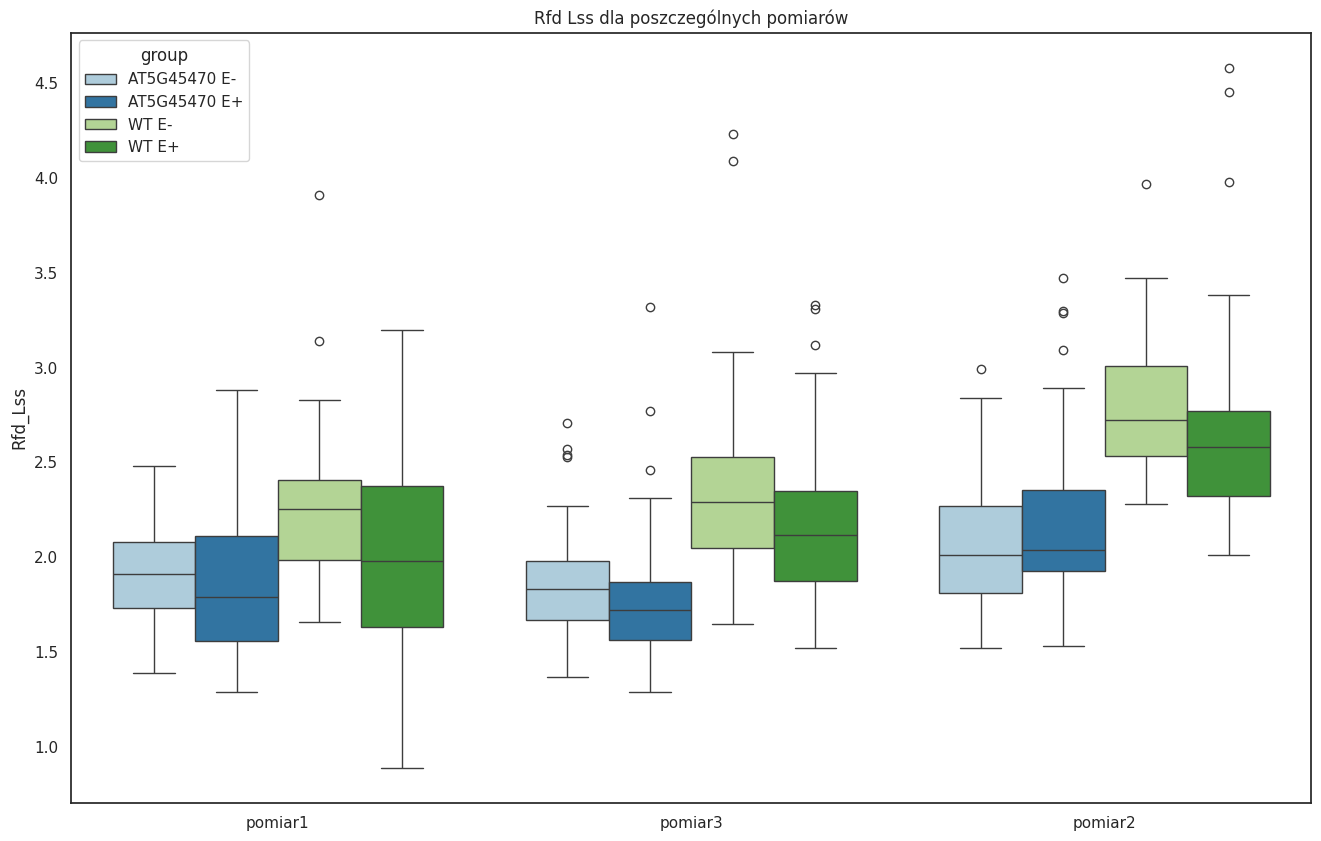

In [47]:
plt.figure(figsize=(16,10))

# Create a new column that combines 'plant' and 'inoculation'
df['group'] = df['plant'] + ' ' + df['inoculation']

sns.set_theme(style="white")
custom_palette = {"AT5G45470 E-": "#A6CEE3", 
                  "AT5G45470 E+": "#1F78B4",
                  "WT E-": "#B2DF8A",
                  "WT E+": "#33A02C"}

# Create and display the plot
sns.boxplot(x="Pomiar",
            y="Rfd_Lss",
            hue="group",
            data=df,
            palette=custom_palette,
            width=0.8)

ax = plt.gca()
ax.set_xlabel('')
plt.title('Rfd Lss dla poszczególnych pomiarów')

plt.savefig(my_path + 'fluorCAM/plots/rfd_lss.png')

plt.show()

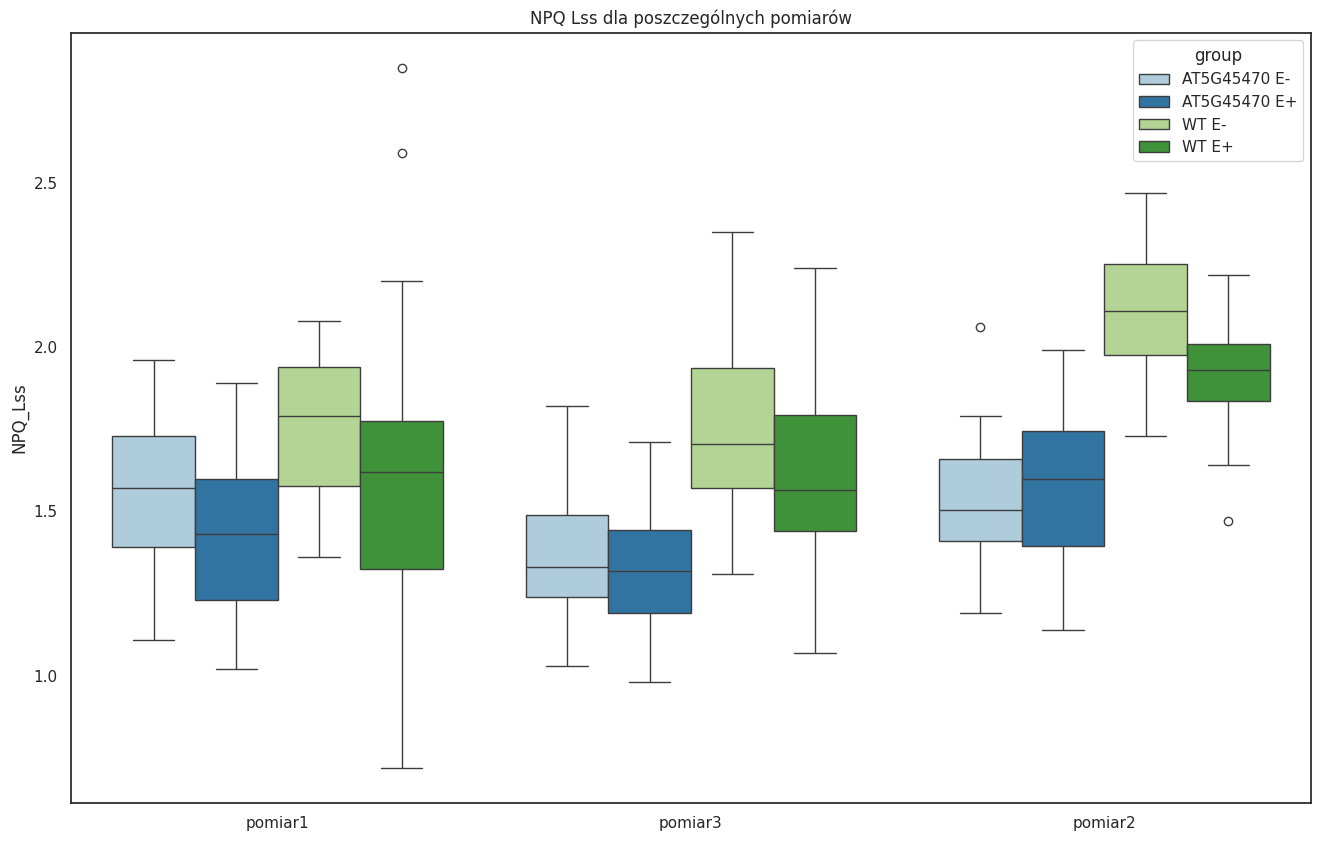

In [46]:
plt.figure(figsize=(16,10))

sns.set_theme(style="white")
custom_palette = {"AT5G45470 E-": "#A6CEE3", 
                  "AT5G45470 E+": "#1F78B4",
                  "WT E-": "#B2DF8A",
                  "WT E+": "#33A02C"}

sns.boxplot(x="Pomiar",
            y="NPQ_Lss",
            hue="group",
            data=df,
            palette=custom_palette,
            width=0.8)

ax = plt.gca()
ax.set_xlabel('')
plt.title('NPQ Lss dla poszczególnych pomiarów')

plt.savefig(my_path + 'fluorCAM/plots/npq_lss.png')

plt.show()